# Q6

Import some prerequisites:

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Run this cell for plotting.

In [9]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Here is for your helper functions(optional).

Implement this function to get the input image and return the skeleton of the input image.

In [10]:
def dilate(img, kernel): 
    '''
    Dialates image with given kernel.

    Parameters:
        img (np.ndarray): The image to dialate.
        kernel (np.ndarray): The kernel to dialate image with.

    Returns:
        np.ndarray: The dialated image.
    '''
    copy_img = img.copy()
    copy_img[copy_img < 128] = 0
    copy_img[copy_img >= 128] = 1
    kernel = np.rot90(kernel, k=2)
    img_dialated = np.zeros(img.shape)
    w, h = img.shape
    k_w, k_h = kernel.shape
    for i in range(k_w//2, w-k_w//2):
        for j in range(k_h//2, h-k_h//2):
            res = np.logical_and(copy_img[i-k_w//2:i+k_w//2+1, j-k_h//2:j+k_h//2+1], kernel)
            if np.any(res):
                img_dialated[i, j] = 1
    return img_dialated * 255

Test implementation

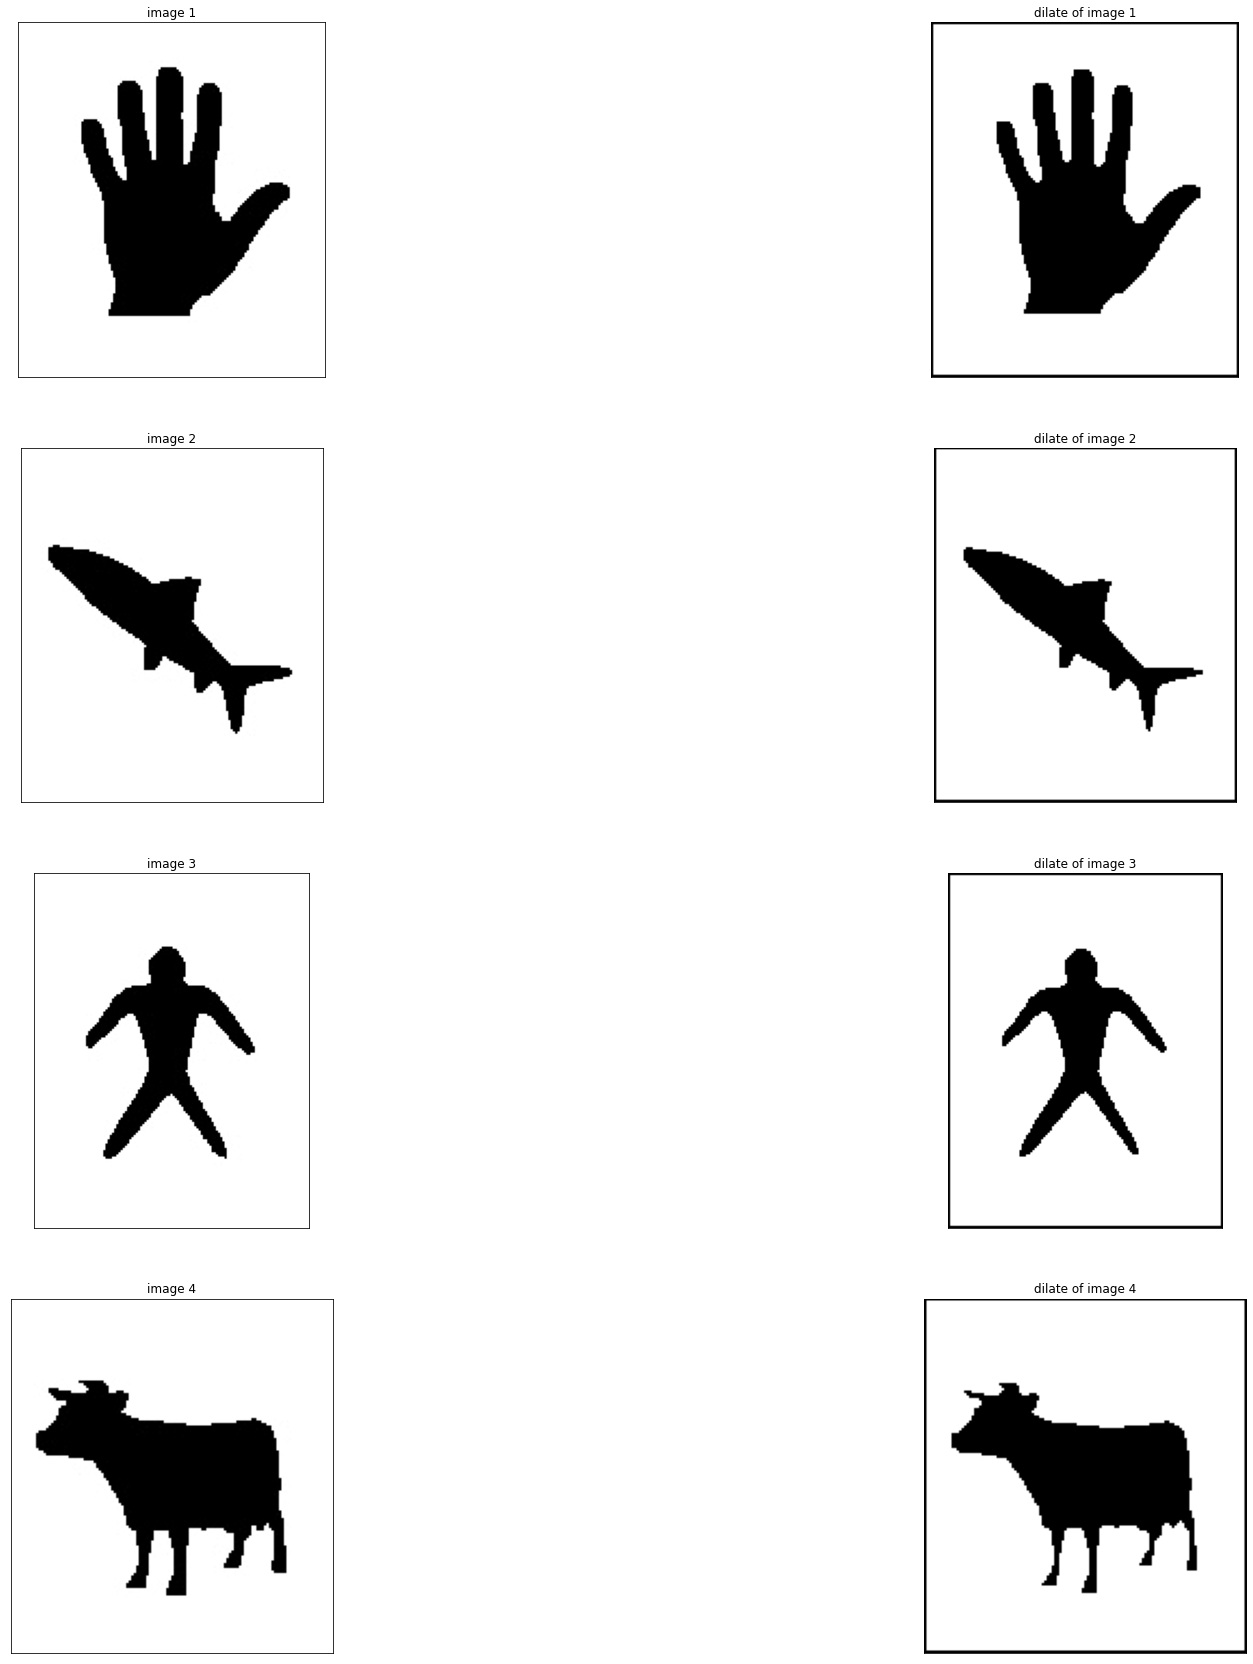

In [11]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_dilate = dilate(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_dilate, 'dilate of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_dilate= dilate(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_dilate, 'dilate of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_dilate = dilate(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_dilate, 'dilate of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_dilate = dilate(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_dilate, 'dilate of image 4', 'img'])

plotter(image_list, 4, 2, True, 30,30, 'Q6-a-dilate')

In [12]:
def erode(img, kernel): 
    '''
    Erodes image with given kernel.

    Parameters:
        img (np.ndarray): The image to erode.
        kernel (np.ndarray): The kernel to erode image with.

    Returns:
        np.ndarray: The eroded image.
    '''
    img_eroded = np.zeros(img.shape)
    copy_img = img.copy()
    copy_img[copy_img < 128] = 0
    copy_img[copy_img >= 128] = 1
    w, h = img.shape
    k_w, k_h = kernel.shape
    for i in range(k_w//2, w-k_w//2):
        for j in range(k_h//2, h-k_h//2):
            if np.array_equal(np.logical_and(copy_img[i-k_w//2:i+k_w//2+1, j-k_h//2:j+k_h//2+1], kernel), kernel):
                img_eroded[i, j] = 1
    return img_eroded * 255

Test your implementation

(157, 136)
(157, 136)


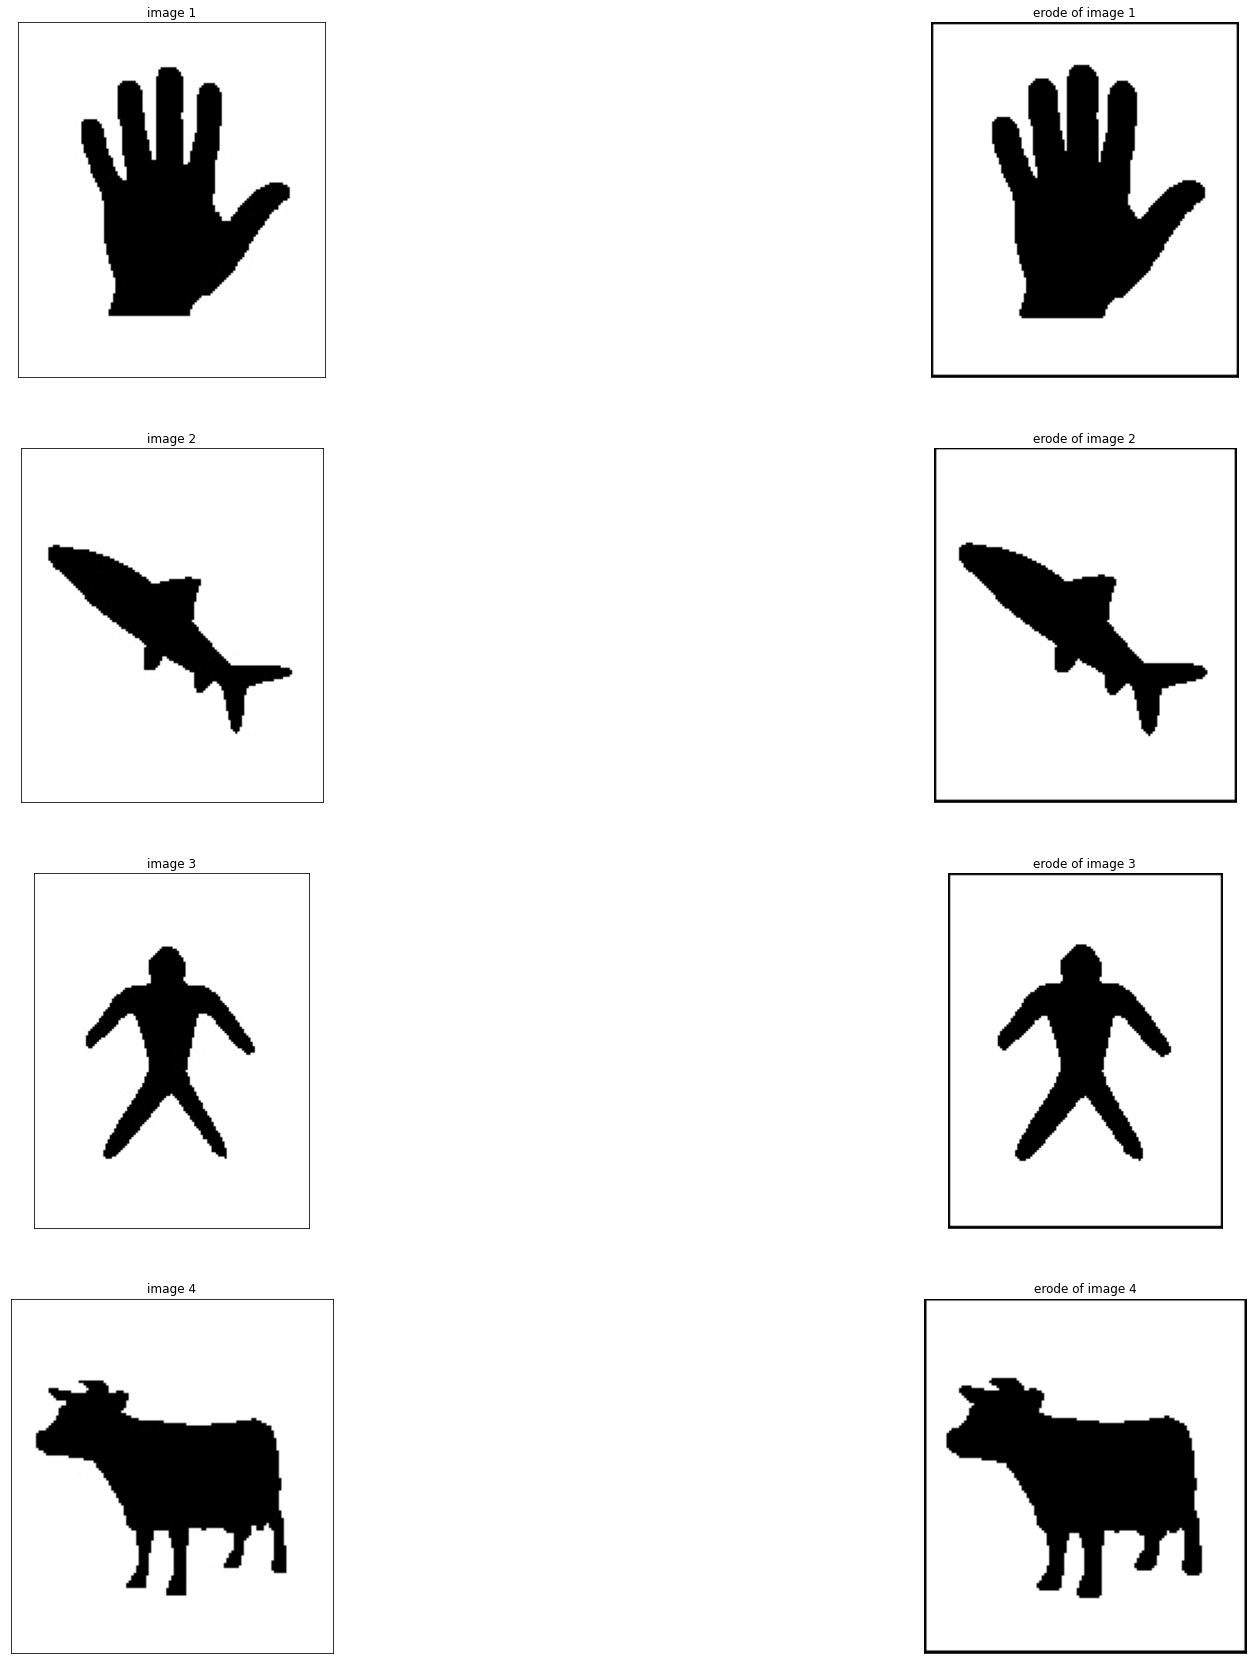

In [13]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_erode = erode(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_erode, 'erode of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_erode= erode(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_erode, 'erode of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_erode = erode(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_erode, 'erode of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_erode = erode(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_erode, 'erode of image 4', 'img'])
print(image1.shape)
print(image1_erode.shape)
plotter(image_list, 4, 2, True, 30,30, 'Q6-a-erode')

In [14]:
def open_morphology(img, kernel): 
    '''
    Performs opening morphology operation on the image.

    Parameters:
        img (numpy.ndarray): The image to perform opening morphology operation on.

    Returns:
        numpy.ndarray: The result image.
    '''
    img_opened = dilate(erode(img, kernel), kernel)
    return img_opened

Test your implementatino

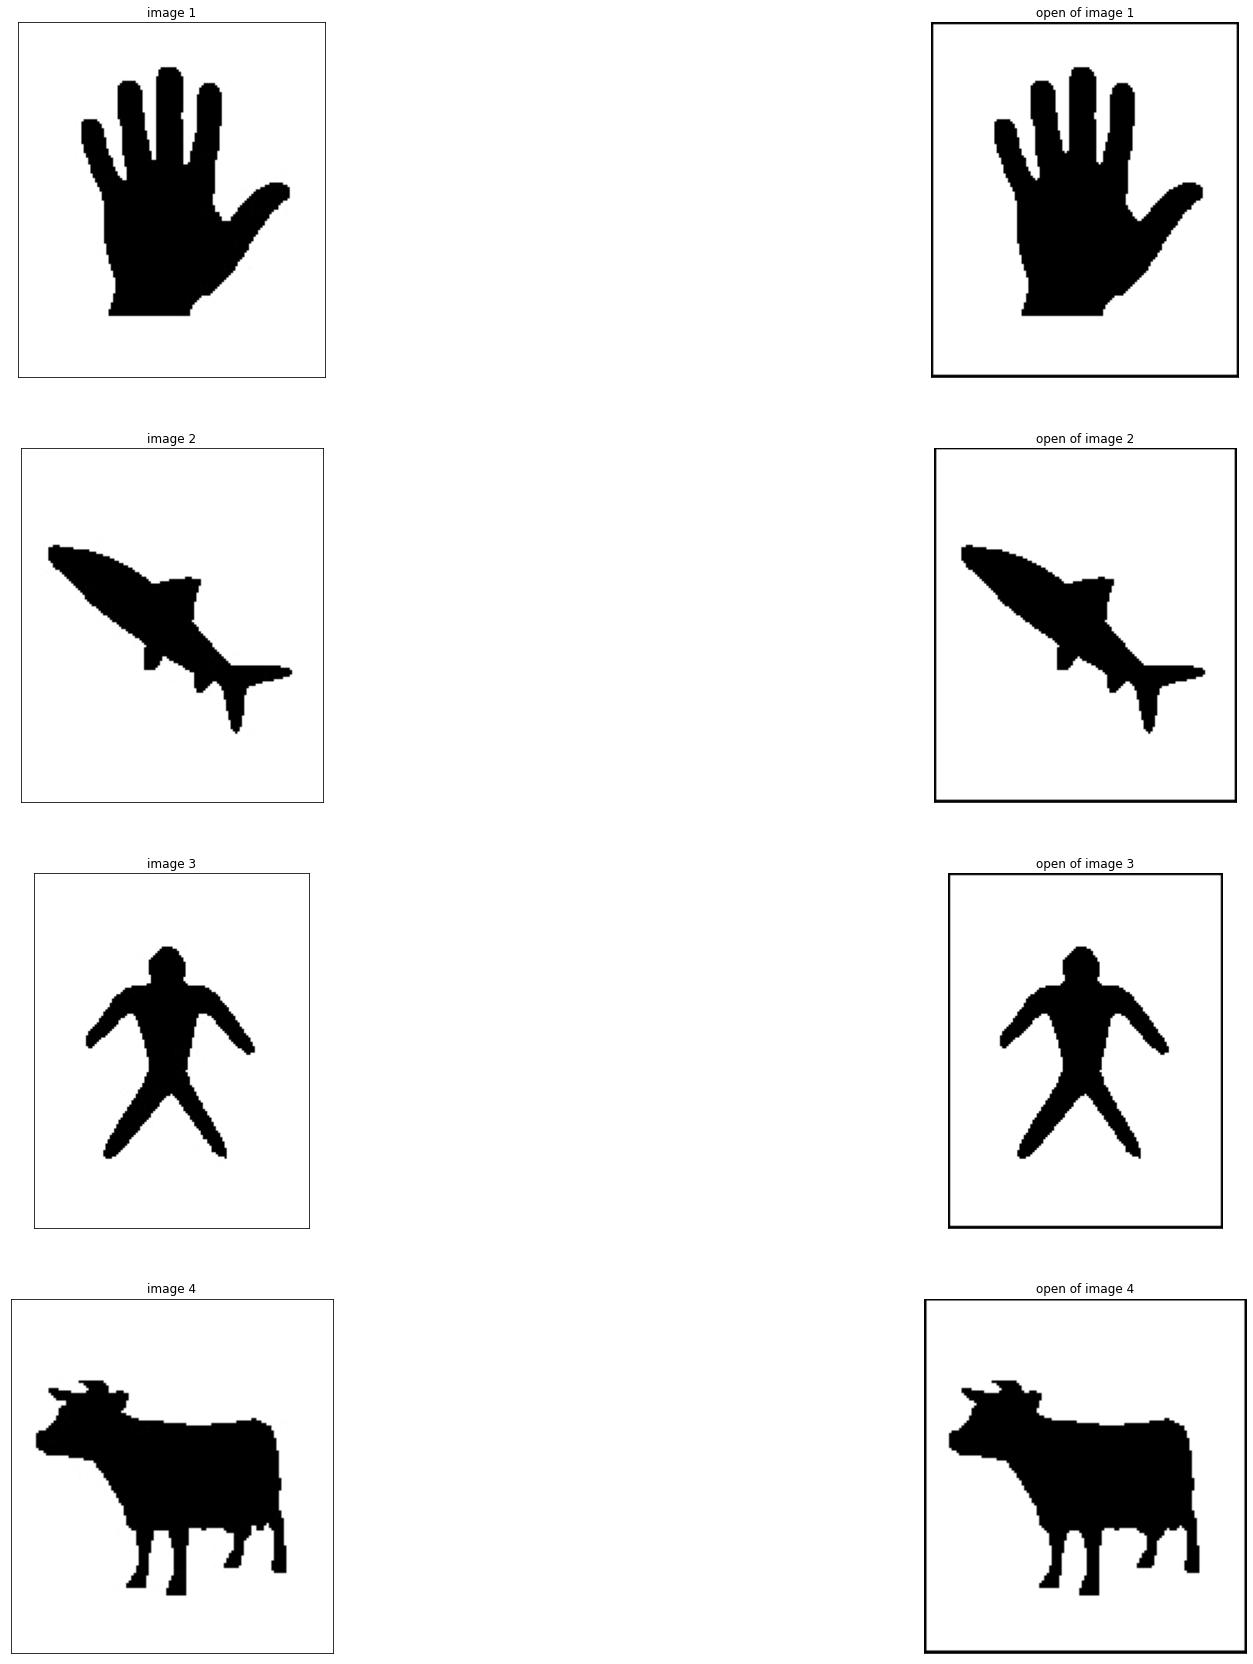

In [15]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_open = open_morphology(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_open, 'open of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_open= open_morphology(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_open, 'open of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_open = open_morphology(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_open, 'open of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_open = open_morphology(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_open, 'open of image 4', 'img'])

plotter(image_list, 4, 2, True, 30,30, 'Q6-a-open')

In [16]:
def close_morphology(img, kernel): 
    '''
    Performs closing morphology operation on the image.

    Parameters:
        img (numpy.ndarray): The image to perform closing morphology operation on.

    Returns:
        numpy.ndarray: The result image.
    '''
    img_closed = erode(dilate(img, kernel), kernel)
    return img_closed

Test your implemention

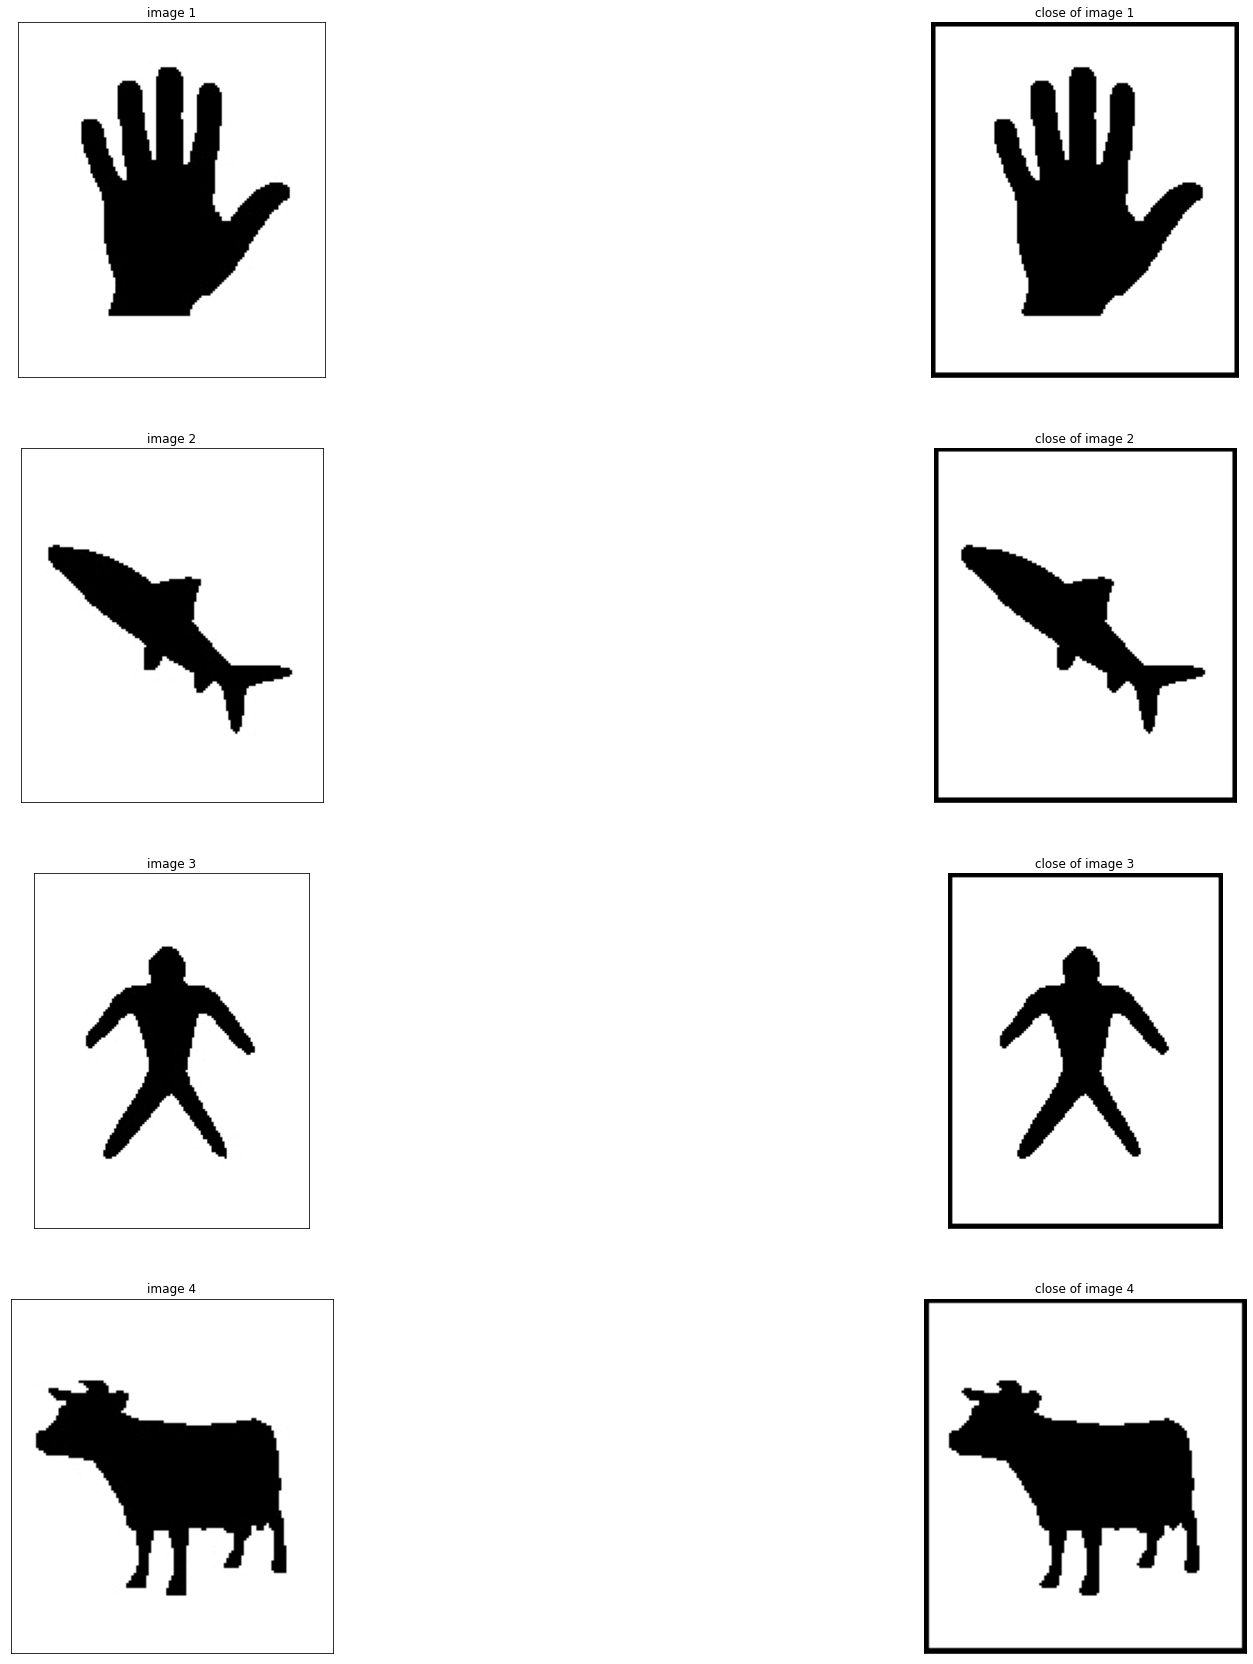

In [17]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_close = close_morphology(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_close, 'close of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_close= close_morphology(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_close, 'close of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_close = close_morphology(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_close, 'close of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_close = close_morphology(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_close, 'close of image 4', 'img'])

plotter(image_list, 4, 2, True, 30,30, 'Q6-a-close')

# Part 2

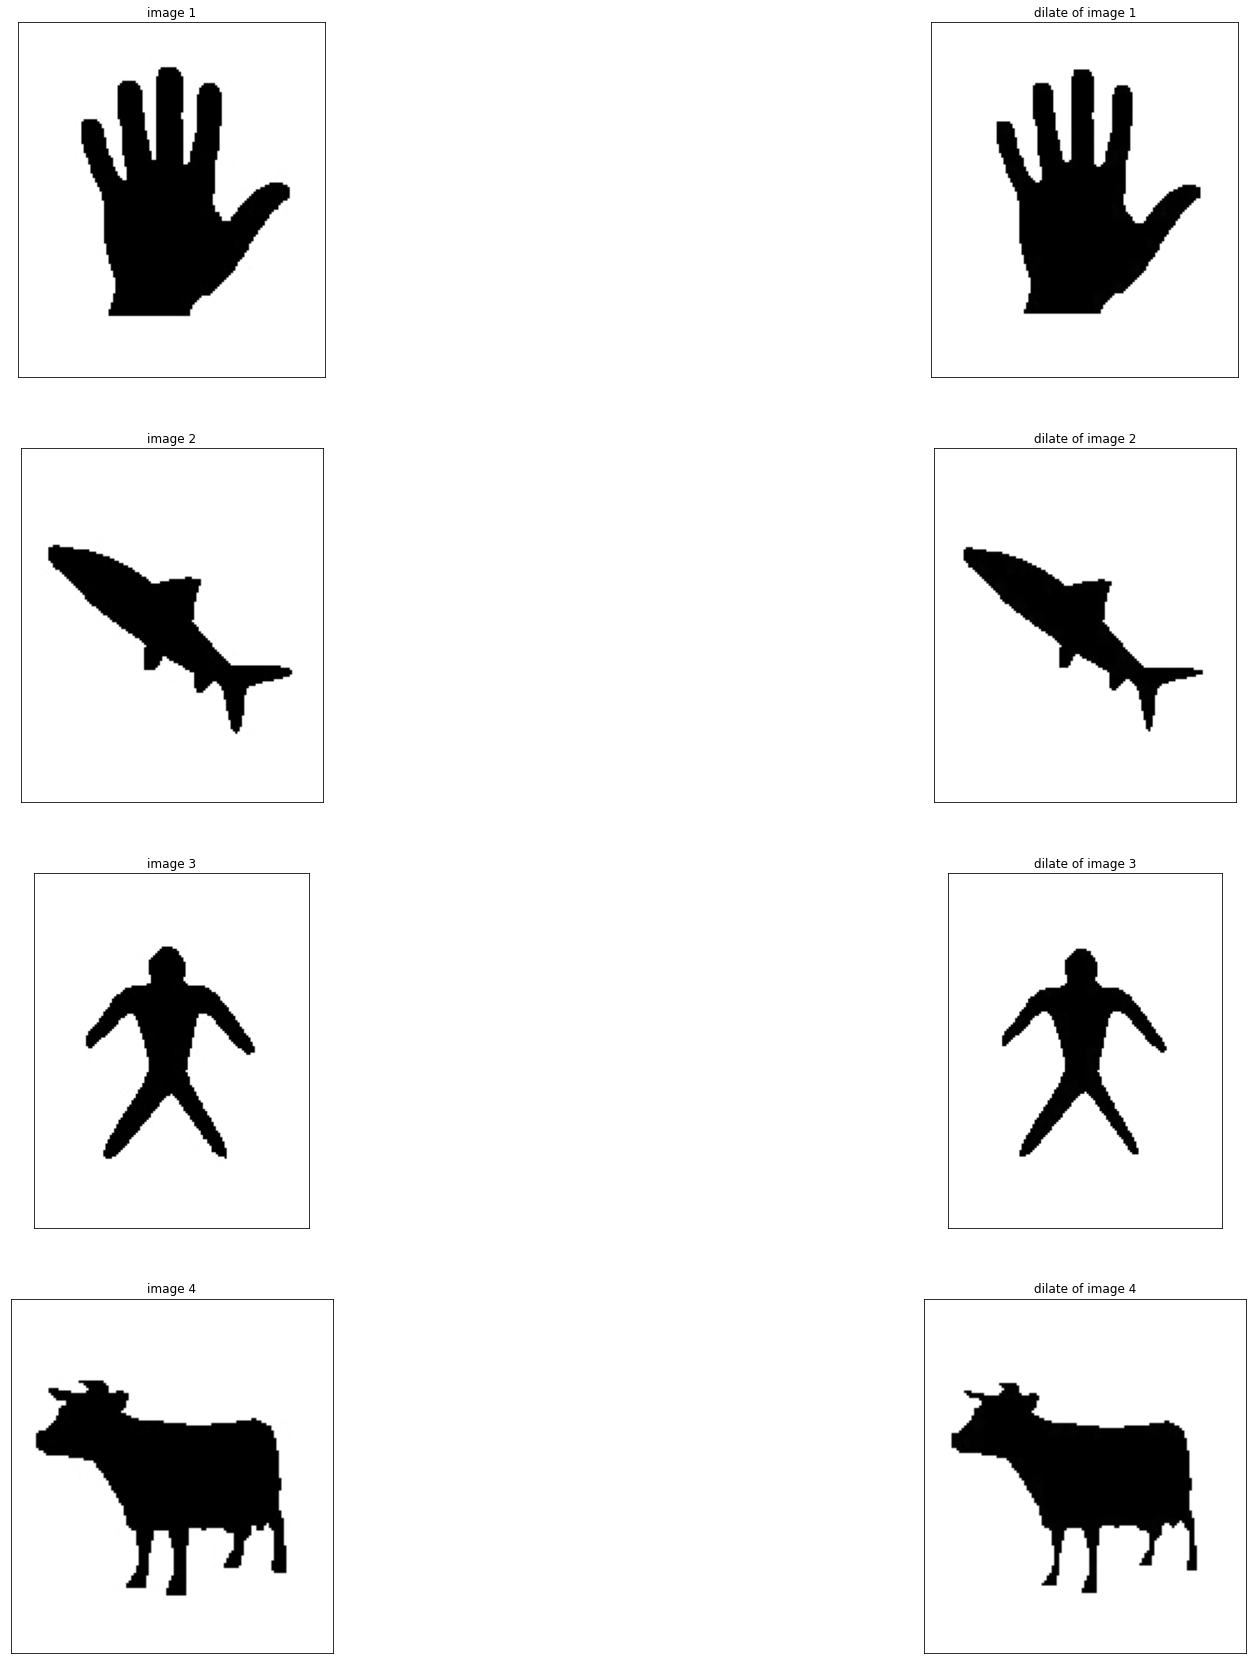

In [53]:
#Write your code here
#Like last part, you should make output of each operation separately. Name output image files like this format: Q6-b-dilate, Q6-b-erode
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_dilate = cv2.dilate(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8), iterations=1)
image_list.append([image1_dilate, 'dilate of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_dilate= cv2.dilate(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8), iterations=1)
image_list.append([image2_dilate, 'dilate of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_dilate = cv2.dilate(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8), iterations=1)
image_list.append([image3_dilate, 'dilate of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_dilate = cv2.dilate(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8), iterations=1)
image_list.append([image4_dilate, 'dilate of image 4', 'img'])

plotter(image_list, 4, 2, True, 30,30, 'Q6-b-dilate')

(157, 136)
(157, 136)


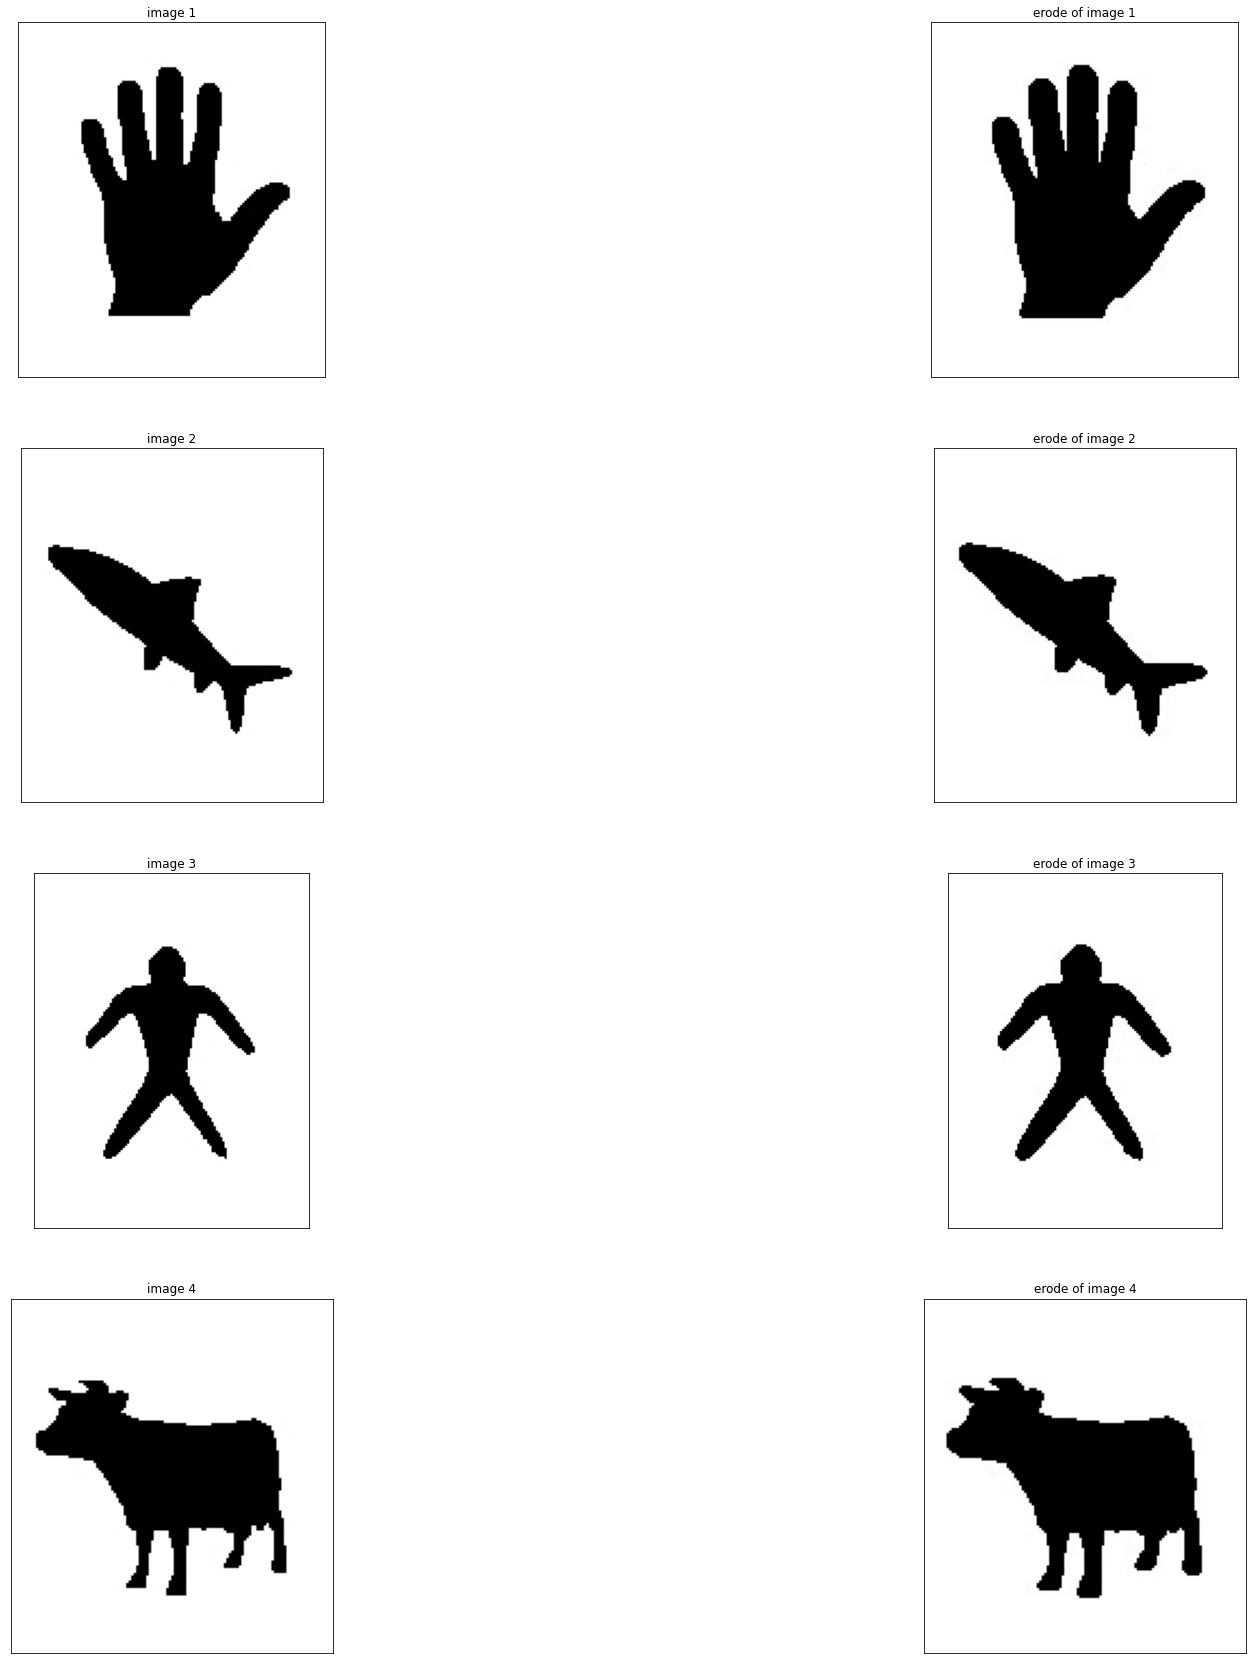

In [54]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_erode = cv2.erode(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8), iterations=1)
image_list.append([image1_erode, 'erode of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_erode = cv2.erode(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8), iterations=1)
image_list.append([image2_erode, 'erode of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_erode = cv2.erode(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8), iterations=1)
image_list.append([image3_erode, 'erode of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_erode = cv2.erode(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8), iterations=1)
image_list.append([image4_erode, 'erode of image 4', 'img'])
print(image1.shape)
print(image1_erode.shape)
plotter(image_list, 4, 2, True, 30,30, 'Q6-b-erode')

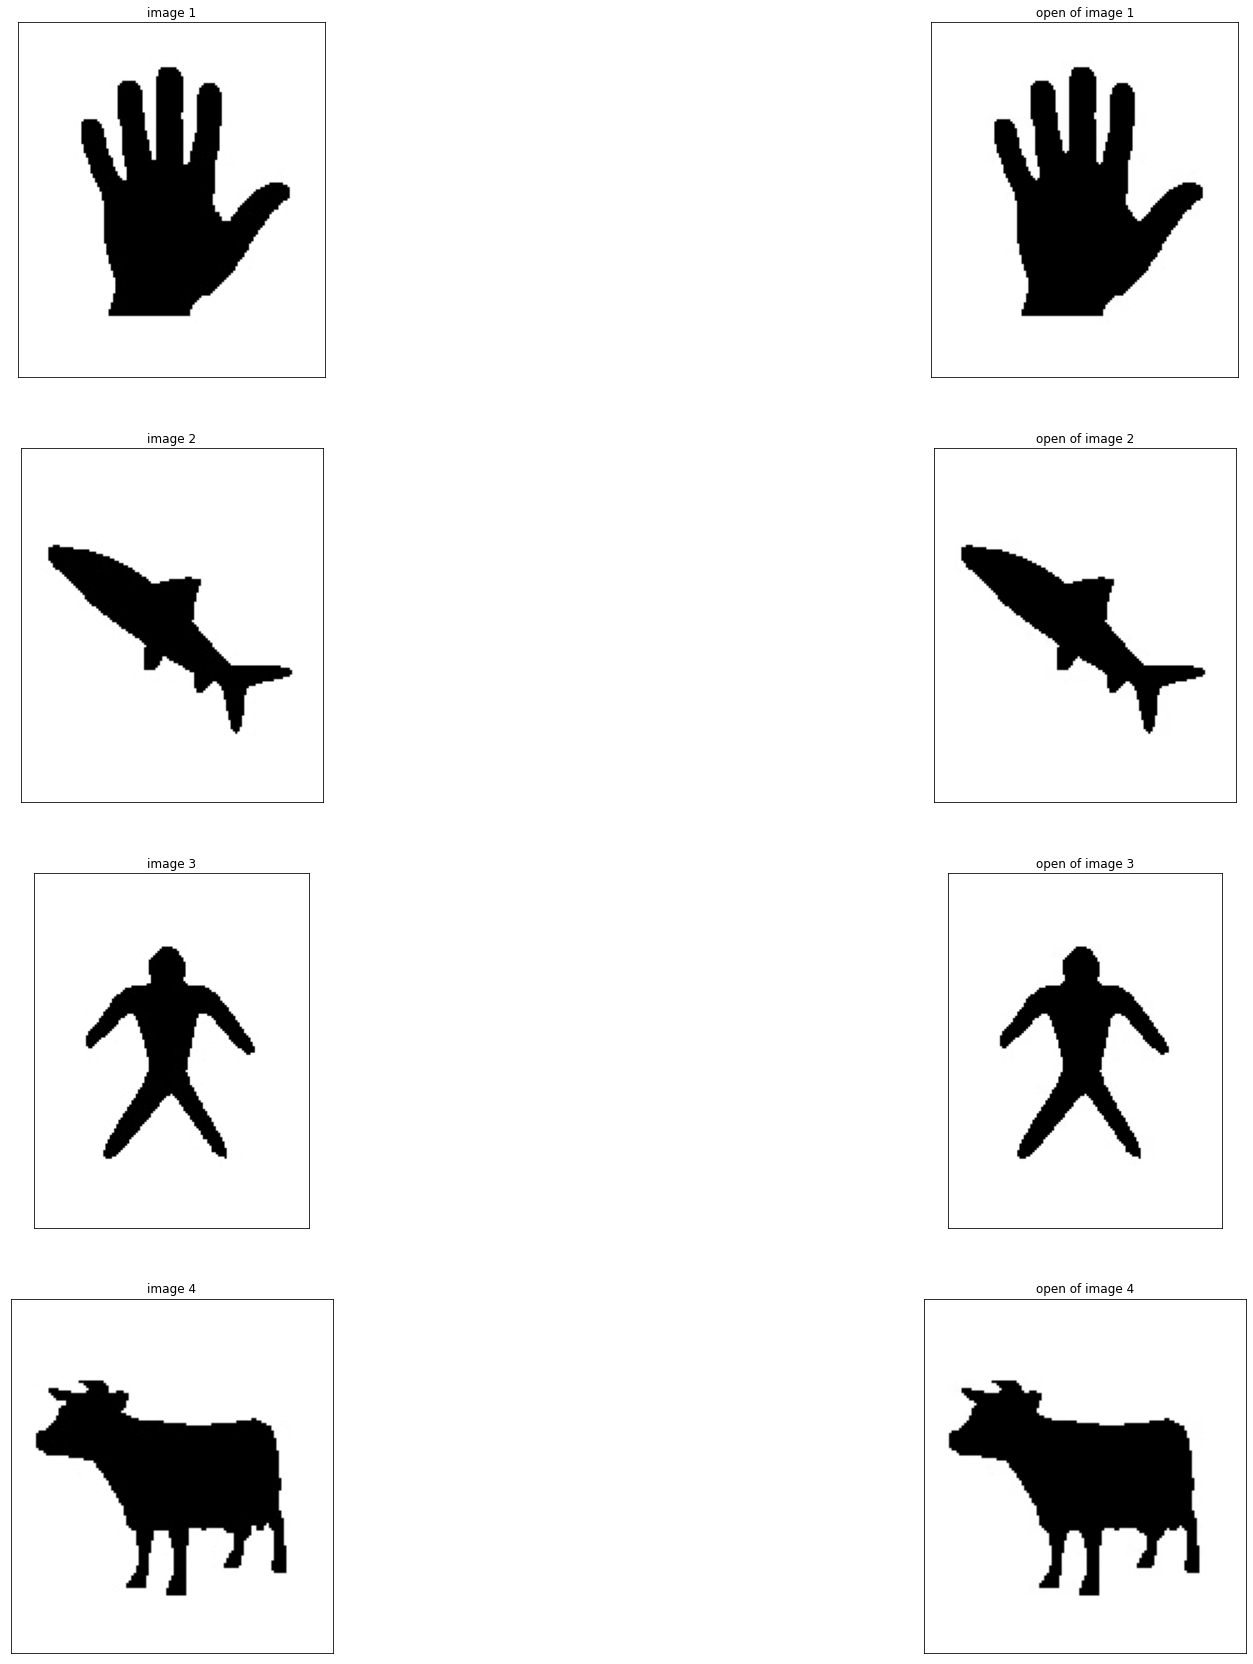

In [55]:
image_list = []
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)
image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_open = cv2.morphologyEx(image1, cv2.MORPH_OPEN, kernel, iterations=1)
image_list.append([image1_open, 'open of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_open= cv2.morphologyEx(image2, cv2.MORPH_OPEN, kernel, iterations=1)
image_list.append([image2_open, 'open of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_open = cv2.morphologyEx(image3, cv2.MORPH_OPEN, kernel, iterations=1)
image_list.append([image3_open, 'open of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_open = cv2.morphologyEx(image4, cv2.MORPH_OPEN, kernel, iterations=1)
image_list.append([image4_open, 'open of image 4', 'img'])

plotter(image_list, 4, 2, True, 30,30, 'Q6-b-open')

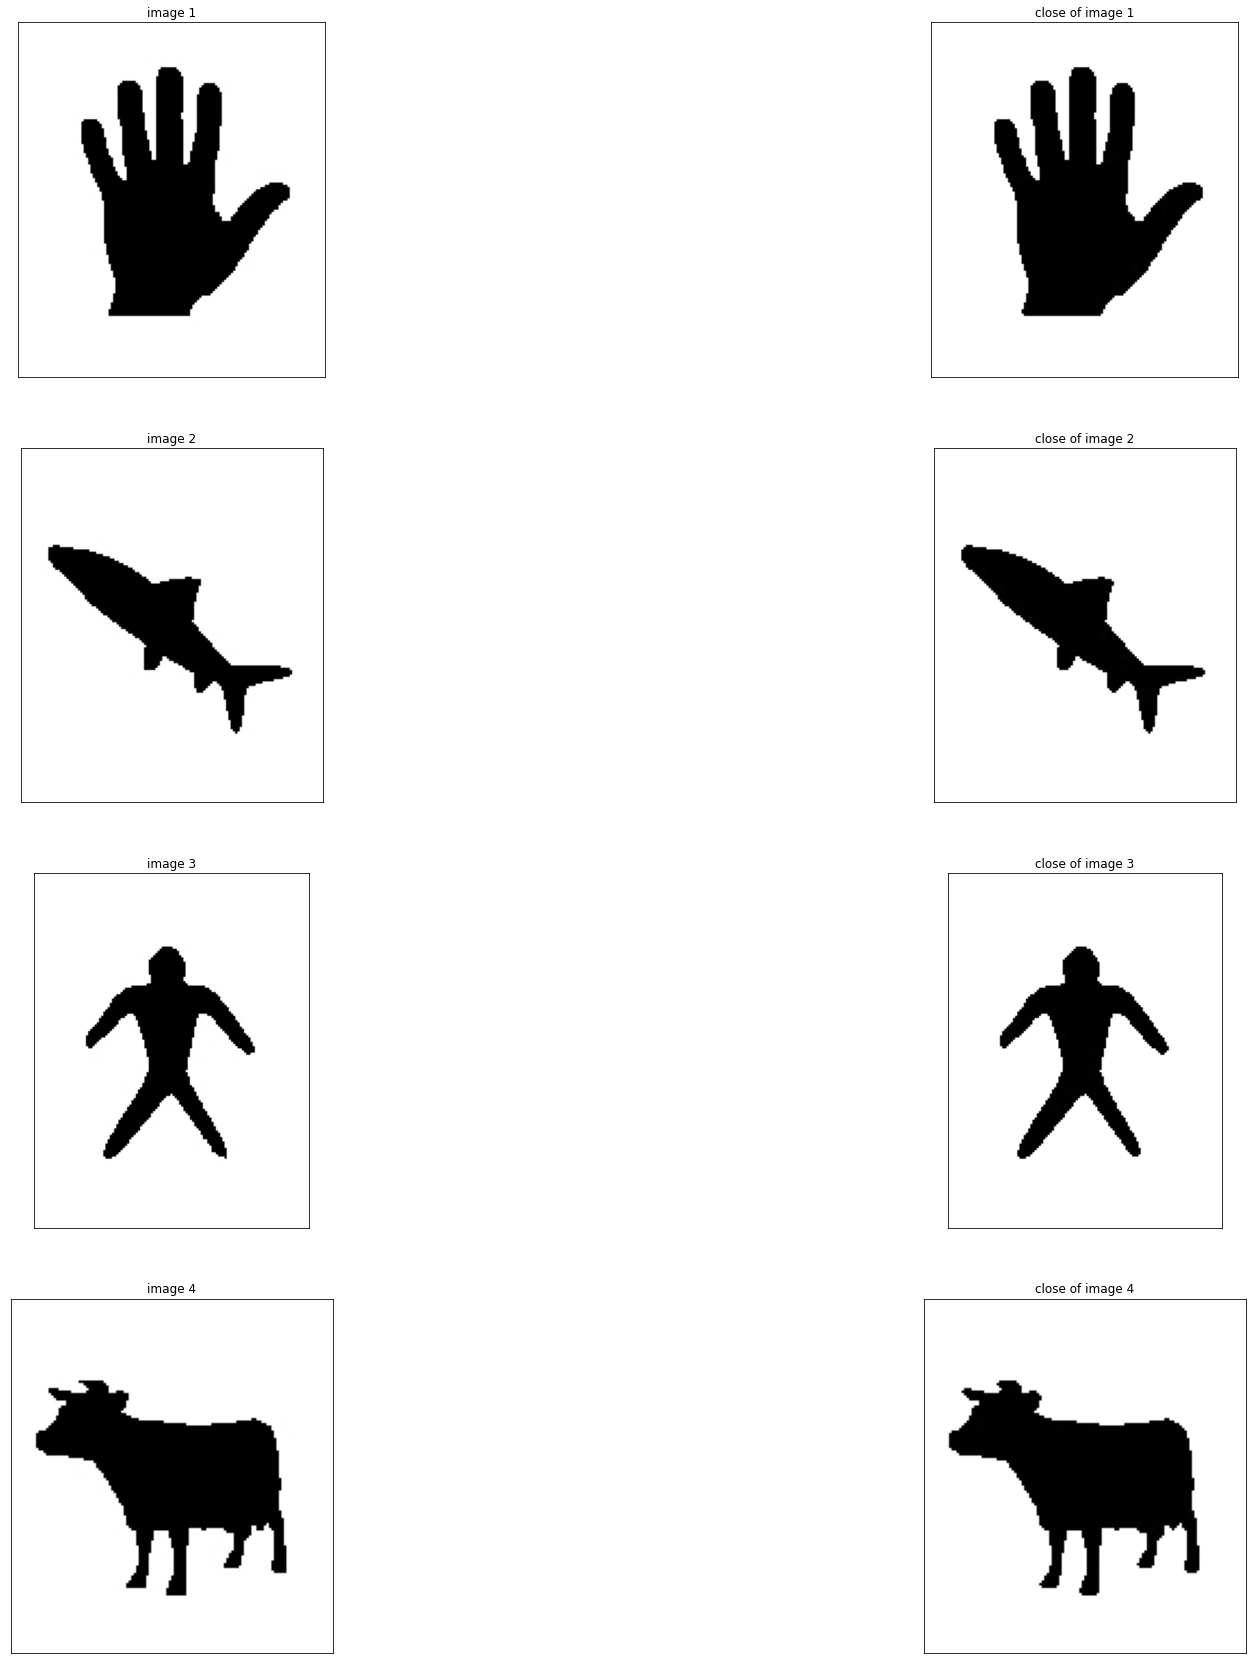

In [56]:
image_list = []
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)
image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_close = cv2.morphologyEx(image1, cv2.MORPH_CLOSE, kernel, iterations=1)
image_list.append([image1_close, 'close of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_close= cv2.morphologyEx(image2, cv2.MORPH_CLOSE, kernel, iterations=1)
image_list.append([image2_close, 'close of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_close = cv2.morphologyEx(image3, cv2.MORPH_CLOSE, kernel, iterations=1)
image_list.append([image3_close, 'close of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_close = cv2.morphologyEx(image4, cv2.MORPH_CLOSE, kernel, iterations=1)
image_list.append([image4_close, 'close of image 4', 'img'])

plotter(image_list, 4, 2, True, 30,30, 'Q6-b-close')

# Part 3: optional
Skeleton of image

In [30]:
def get_skeleton(image, kernel):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
    """
    image_rev = image.copy()
    image_rev[image < 128] = 1
    image_rev[image >= 128] = 0
    res = np.zeros(image.shape)
    eroded_img = image_rev.copy()
    while(np.any(eroded_img)):
        opened_img = cv2.morphologyEx(eroded_img, cv2.MORPH_OPEN, kernel.astype(np.uint8), iterations=1)
        res = np.logical_or(res, (eroded_img - opened_img))
        eroded_img = cv2.erode(eroded_img, kernel.astype(np.uint8), iterations=1)    
    
    return res

Test your implementation (don't change this cell).

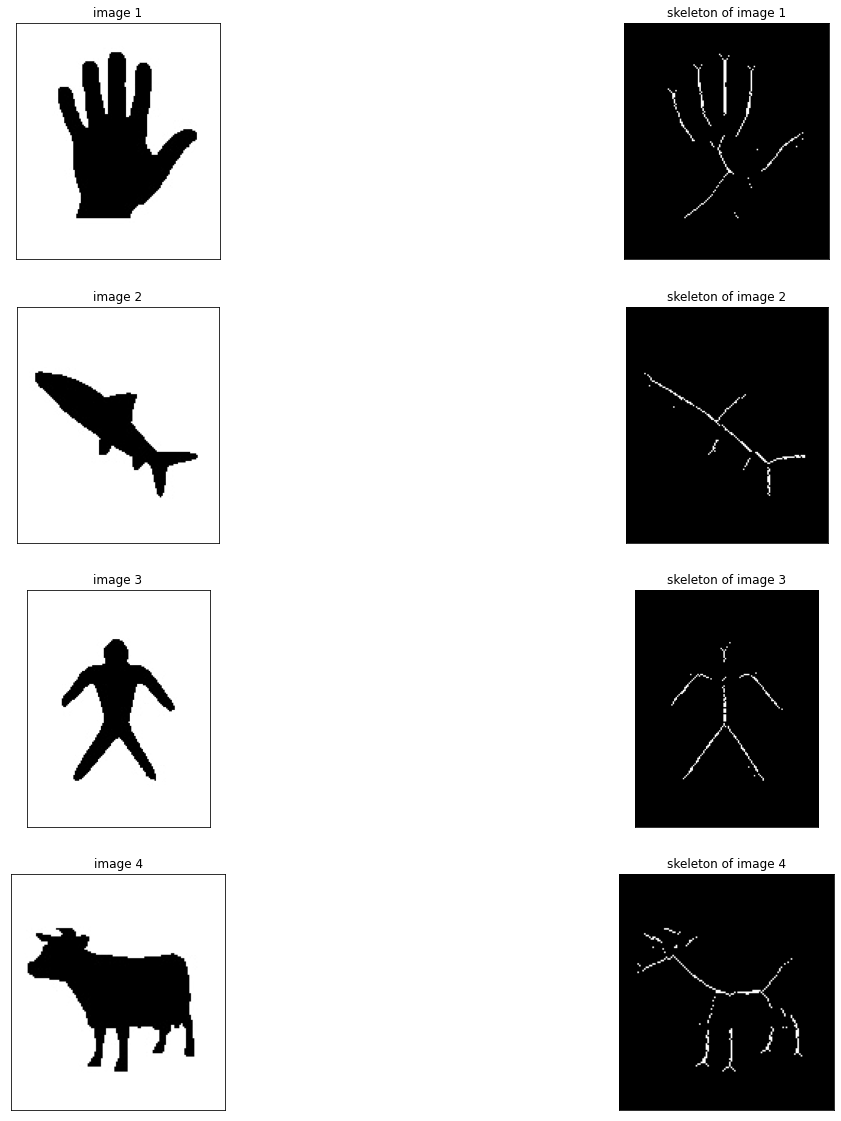

In [31]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton = get_skeleton(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton= get_skeleton(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton = get_skeleton(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton = get_skeleton(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 20,20, 'Q6-c')

End!!!